In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## 数据预处理

In [2]:
path = 'E:nlp课件/test_data/temps.csv'
features = pd.read_csv(path)
features.head()

,year,month,day,week,temp_2,temp_1,average,actual,friend
0,2016,1,1,Fri,45,45,45.6,45,29
1,2016,1,2,Sat,44,45,45.7,44,61
2,2016,1,3,Sun,45,44,45.8,41,56
3,2016,1,4,Mon,44,41,45.9,40,53
4,2016,1,5,Tues,41,40,46.0,44,41


In [3]:
print('数据维度', features.shape)

数据维度 (348, 9)


In [4]:
# 处理时间
years = features['year']
month = features['month']
day = features['day']
date = [str(int(year)) +'-'+str(int(month)) +'-'+str(int(day)) for year, month, day in zip(years, month, day)]
date[:5]

['2016-1-1', '2016-1-2', '2016-1-3', '2016-1-4', '2016-1-5']

In [5]:
from datetime import datetime
dates = [datetime.strptime(date, '%Y-%m-%d') for date in date]
dates[:5]

[datetime.datetime(2016, 1, 1, 0, 0),
 datetime.datetime(2016, 1, 2, 0, 0),
 datetime.datetime(2016, 1, 3, 0, 0),
 datetime.datetime(2016, 1, 4, 0, 0),
 datetime.datetime(2016, 1, 5, 0, 0)]

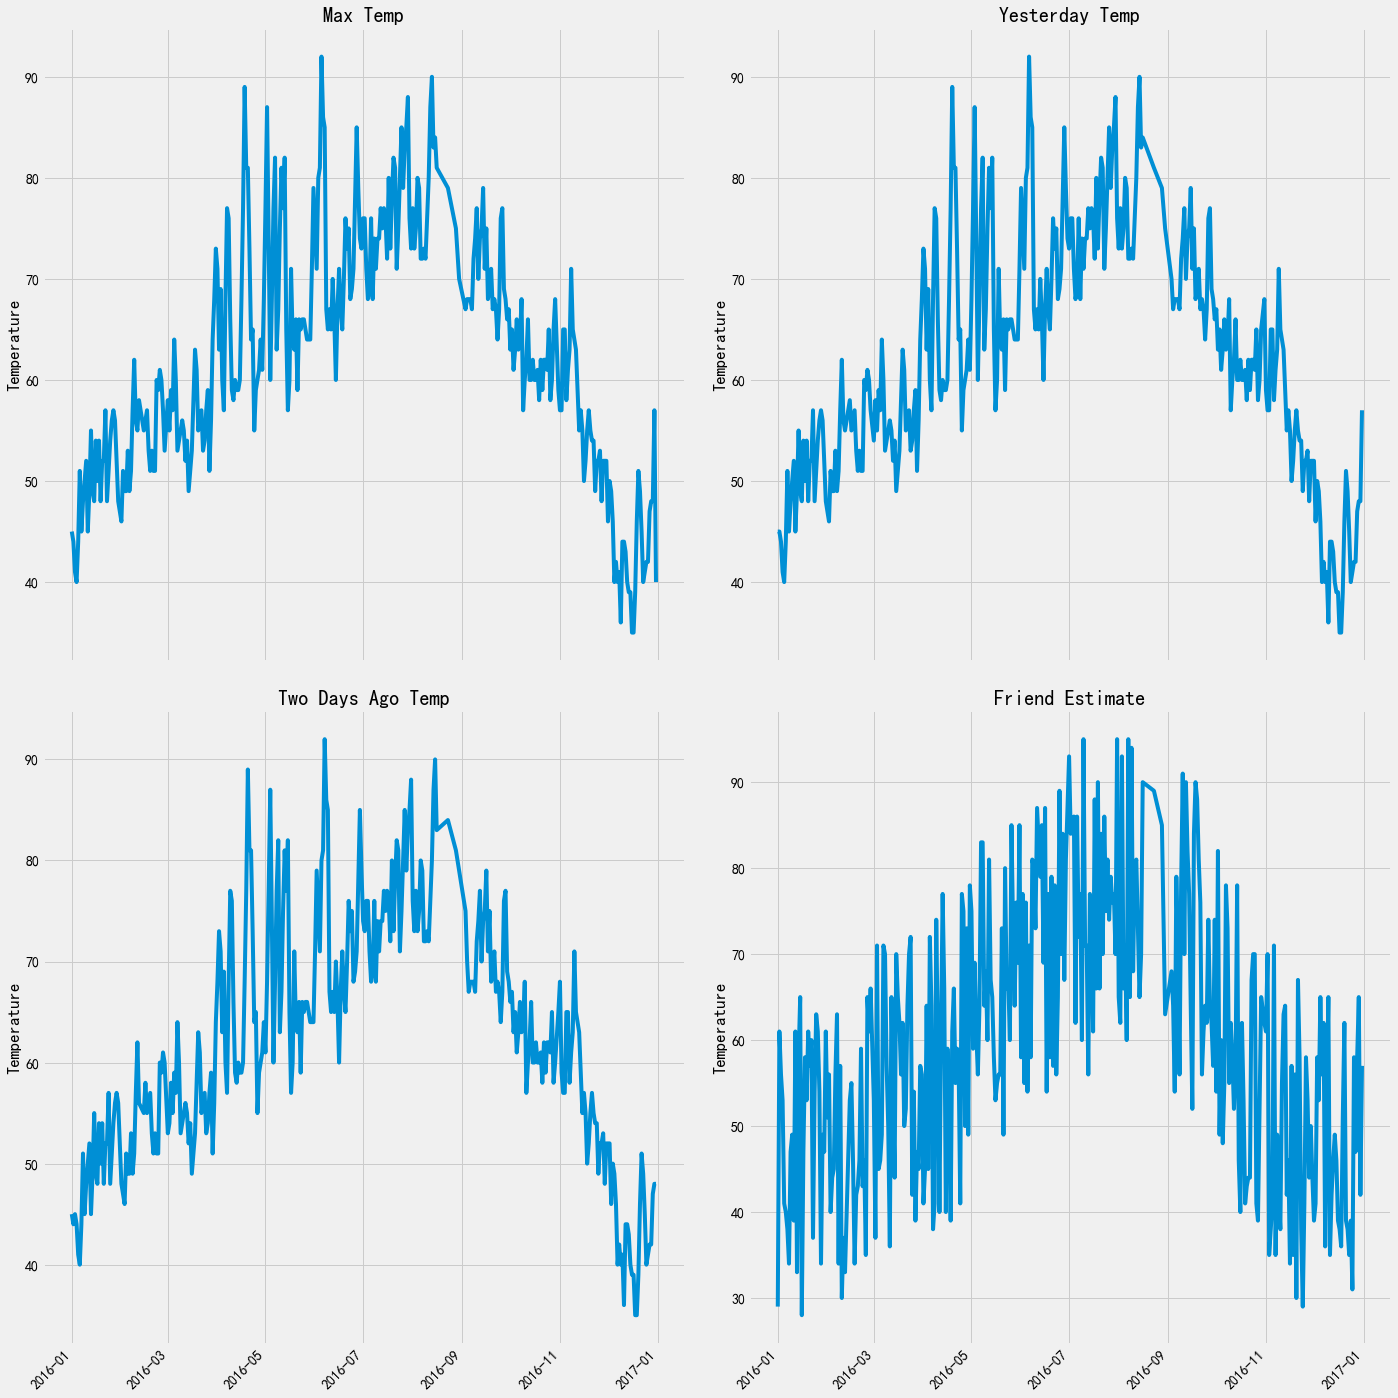

In [6]:
# 绘制图像
plt.style.use('fivethirtyeight')
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (20,20))
fig.autofmt_xdate(rotation = 45)

# 标签值
ax1.plot(dates, features['actual'])
ax1.set_xlabel('')
ax1.set_ylabel('Temperature')
ax1.set_title('Max Temp')

# 昨天最高温度
ax2.plot(dates, features['temp_1'])
ax2.set_xlabel('')
ax2.set_ylabel('Temperature')
ax2.set_title('Yesterday Temp')

# 前天最高温度
ax3.plot(dates, features['temp_2'])
ax3.set_xlabel('')
ax3.set_ylabel('Temperature')
ax3.set_title('Two Days Ago Temp')

# friend 
ax4.plot(dates, features['friend'])
ax4.set_xlabel('')
ax4.set_ylabel('Temperature')
ax4.set_title('Friend Estimate')

plt.tight_layout(pad = 2)

In [7]:
# 进行one-hot
features = pd.get_dummies(features)
features[: 5]

,year,month,day,temp_2,temp_1,average,actual,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,41,0,0,0,0,0,1,0


In [8]:
# 获取目标值
label = np.array(features['actual'])
label[:5]

array([45, 44, 41, 40, 44], dtype=int64)

In [9]:
# 在特征值中去掉标签
features = features.drop('actual', axis = 1)
features[:5]

,year,month,day,temp_2,temp_1,average,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,41,0,0,0,0,0,1,0


In [10]:
# 保存列名
features_list = list(features.columns)
features_list

['year',
 'month',
 'day',
 'temp_2',
 'temp_1',
 'average',
 'friend',
 'week_Fri',
 'week_Mon',
 'week_Sat',
 'week_Sun',
 'week_Thurs',
 'week_Tues',
 'week_Wed']

In [11]:
features = np.array(features)
features[:5]

array([[2.016e+03, 1.000e+00, 1.000e+00, 4.500e+01, 4.500e+01, 4.560e+01,
        2.900e+01, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00],
       [2.016e+03, 1.000e+00, 2.000e+00, 4.400e+01, 4.500e+01, 4.570e+01,
        6.100e+01, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00],
       [2.016e+03, 1.000e+00, 3.000e+00, 4.500e+01, 4.400e+01, 4.580e+01,
        5.600e+01, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00],
       [2.016e+03, 1.000e+00, 4.000e+00, 4.400e+01, 4.100e+01, 4.590e+01,
        5.300e+01, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00],
       [2.016e+03, 1.000e+00, 5.000e+00, 4.100e+01, 4.000e+01, 4.600e+01,
        4.100e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00]])

In [12]:
features.shape

(348, 14)

## 特征工程

In [13]:
# 进行标准化
from sklearn.preprocessing import StandardScaler
input_features = StandardScaler().fit_transform(features)

In [14]:
input_features[:5]

array([[ 0.        , -1.5678393 , -1.65682171, -1.48452388, -1.49443549,
        -1.3470703 , -1.98891668,  2.44131112, -0.40482045, -0.40961596,
        -0.40482045, -0.40482045, -0.41913682, -0.40482045],
       [ 0.        , -1.5678393 , -1.54267126, -1.56929813, -1.49443549,
        -1.33755752,  0.06187741, -0.40961596, -0.40482045,  2.44131112,
        -0.40482045, -0.40482045, -0.41913682, -0.40482045],
       [ 0.        , -1.5678393 , -1.4285208 , -1.48452388, -1.57953835,
        -1.32804474, -0.25855917, -0.40961596, -0.40482045, -0.40961596,
         2.47023092, -0.40482045, -0.41913682, -0.40482045],
       [ 0.        , -1.5678393 , -1.31437034, -1.56929813, -1.83484692,
        -1.31853195, -0.45082111, -0.40961596,  2.47023092, -0.40961596,
        -0.40482045, -0.40482045, -0.41913682, -0.40482045],
       [ 0.        , -1.5678393 , -1.20021989, -1.8236209 , -1.91994977,
        -1.30901917, -1.2198689 , -0.40961596, -0.40482045, -0.40961596,
        -0.40482045, -0.40

## 构建线性回归模型

In [15]:
x = torch.tensor(input_features, dtype = float)
y = torch.tensor(label, dtype =  float)

In [16]:
# 权重参数初始化   [348,14] * [14, 128] * [128] * [128, 1] * [1]
weights = torch.randn((14, 128), dtype = float, requires_grad = True)
biases = torch.randn(128, dtype = float, requires_grad = True)
weights2 = torch.randn((128, 1), dtype = float, requires_grad = True)
biases2 = torch.randn(1, dtype = float, requires_grad = True)

In [17]:
learning_rate = 0.001
losses = []

In [18]:
for i in range(1000):
    # 计算隐层
    hidden = x.mm(weights) + biases
    # 激活函数
    hidden = torch.relu(hidden)
    # 预测结果
    predictions = hidden.mm(weights2) + biases2
    # 计算损失 - MSE
    loss = torch.mean((predictions - y)**2)
    losses.append(loss.data.numpy)
    
    # 打印损失
    if i % 100 == 0:
        print('loss:', loss)
    # 反向传播
    loss.backward()
    
    
    # 更新参数
    weights.data.add_(- learning_rate * weights.grad.data)
    biases.data.add_(- learning_rate * biases.grad.data)
    weights2.data.add_(- learning_rate * weights2)
    biases2.data.add_(- learning_rate * biases2)
    
    # 更新后梯度置0，否则会累加
    weights.grad.data.zero_()
    biases.grad.data.zero_()
    weights2.grad.data.zero_()
    biases2.grad.data.zero_()

loss: tensor(5689.6443, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(164.8865, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(150.8898, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(146.9042, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(145.5927, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(145.2954, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(145.7715, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(146.9603, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(148.9035, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(151.7627, dtype=torch.float64, grad_fn=<MeanBackward0>)


## 序列化容器构建网络模型


In [19]:
import torch.nn as nn
import torch.optim as optim

In [20]:
input_features.shape[1]

14

In [21]:
input_size = input_features.shape[1]  # input_feature[384, 14]  array
hidden_size = 128
output_size = 1
batch_size = 16

In [22]:
model = nn.Sequential(
    nn.Linear(input_size, hidden_size),
    nn.Sigmoid(),
    nn.Linear(hidden_size, output_size)
)

In [23]:
criterion = nn.MSELoss(reduction = 'mean')
optimizer = optim.Adam(model.parameters(), lr = learning_rate)

In [24]:
# 训练网络
loss_list = []
for i in range(1000):
    batch_loss = []
    for start in range(0, len(input_features), batch_size):
        end = batch_size + start if len(input_features) > batch_size + start else len(input_features)
        x = torch.tensor(input_features[start : end], dtype = torch.float, requires_grad = True)
        y = torch.tensor(label[start : end], dtype = torch.float, requires_grad = True)
        optimizer.zero_grad()
        # 前向传播
        output = model(x)
        # 计算损失
        loss = criterion(y, output)
        # 反向传播
        loss.backward()
        # 参数更新
        optimizer.step()
        batch_loss.append(loss.data.numpy())
    if i % 100 == 0:
        loss_list.append(np.mean(batch_loss))
        print(i, np.mean(batch_loss))

0 4004.1833
100 37.701965
200 35.653893
300 35.294693
400 35.12076
500 34.98807
600 34.87408
700 34.763607
800 34.650936
900 34.533474


## 预测训练结果

In [25]:
x = torch.tensor(input_features, dtype = torch.float)

In [26]:
pred = model(x).data.numpy()

In [27]:
pred

array([[47.499313],
       [47.49125 ],
       [47.156116],
       [46.997025],
       [47.47038 ],
       [46.955048],
       [47.52482 ],
       [48.813194],
       [48.556232],
       [49.57166 ],
       [50.945705],
       [49.819008],
       [49.556168],
       [50.486477],
       [49.53444 ],
       [49.536835],
       [51.39804 ],
       [51.942204],
       [52.371307],
       [51.31708 ],
       [50.80094 ],
       [50.746742],
       [52.277477],
       [52.627846],
       [51.922344],
       [52.953175],
       [53.62161 ],
       [53.655354],
       [53.528522],
       [53.379707],
       [52.472435],
       [50.20823 ],
       [50.795547],
       [51.263412],
       [51.26084 ],
       [51.315353],
       [52.259964],
       [51.873726],
       [52.57957 ],
       [54.229816],
       [55.602936],
       [55.116444],
       [54.58548 ],
       [55.171227],
       [55.680832],
       [55.10178 ],
       [54.75301 ],
       [54.712814],
       [53.92162 ],
       [54.506332],


## 绘制真实和预测值的曲线

In [28]:
dates = [str(int(year)) + '-' + str(int(month)) + '-'+ str(int(day)) for year, month, day in zip(years, month, day)]
dates = [datetime.strptime(date, '%Y-%m-%d') for date in dates]

In [29]:
actual = label

In [30]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

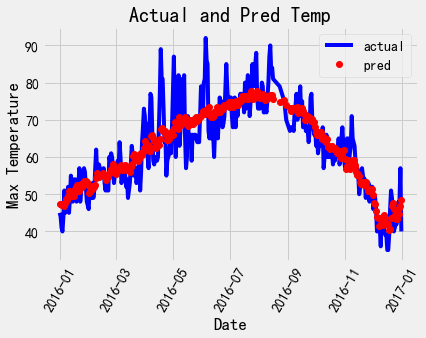

In [31]:
plt.plot(dates, label,  'b-', label = 'actual')
plt.plot(dates, pred, 'ro', label = 'pred')
plt.xlabel('Date')
plt.xticks(rotation = '60')
plt.ylabel('Max Temperature')
plt.title('Actual and Pred Temp')
plt.legend(loc = 'upper right')
